# 使用Cifar10練習影像分類，加入模型存取與最重要的資料擴增

In [1]:
#匯入函式庫，數值矩陣計算numpy，以及畫圖用的matplotlib
import numpy as np
import matplotlib.pyplot as plt

#匯入
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
#匯入tensorflow的函式庫，以及cifar10
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
#註：呼叫這些功能的寫法有兩種，以cifar10為例
#一、直接打一整串：tf.keras.datasets.cifar10.load_data()
#二、在一開始的地方使用from tensorflow.keras.datasets import cifar10，以後只要用cifar10.load_data()即可

## 讀取與檢視資料

In [4]:
#使用cifar10的資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

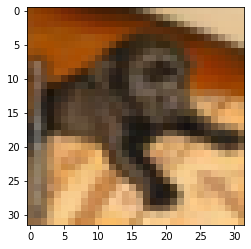

In [6]:
plt.imshow(X_train[56])

In [7]:
# 0 : airplain (飛機)
# 1 : automobile (汽車)
# 2 : bird (鳥)
# 3 : cat (貓)
# 4 : deer (鹿)
# 5 : dog (狗)
# 6 : frog (青蛙)
# 7 : horse (馬)
# 8 : ship (船)
# 9 : truck (卡車)

## 影像前處理

In [8]:
#對影像作正規化
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255

In [9]:
#對類別資料作One-hot encoding
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)

## 建立AI模型

In [22]:
#撰寫模型
input_layer=tf.keras.layers.Input(shape=(32,32,3))

x=tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(input_layer)
x=tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x=tf.keras.layers.MaxPool2D()(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(32, activation='relu')(x)

output_layer=tf.keras.layers.Dense(10, activation='softmax')(x)

In [23]:
model=tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330 

In [24]:
#data augmentation相關設定
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)  

## 開始訓練

In [25]:
#告訴AI學習的方式
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [26]:
#將訓練的模型置放於model_path下的model_name
model_name = 'cirfar10'

save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
model_path = os.path.join(save_dir, model_name)

In [27]:
#設定模型存放方式(只存Validation表現最好的那一次)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor = 'val_loss', save_best_only = True, verbose = 1)

#設定多久沒進步就停下來
earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

In [28]:
#開始訓練，順便把訓練過程存到model_history，方便後續畫圖
model_history=model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=50, 
                        steps_per_epoch=len(x_train)/32, validation_data=(x_test,y_test), callbacks=[earlystop, checkpoint])

Epoch 1/50
1562/1562 [==============================] - 18s 11ms/step - loss: 1.6508 - categorical_accuracy: 0.3958 - val_loss: 1.3801 - val_categorical_accuracy: 0.5052

Epoch 00001: val_loss improved from inf to 1.38012, saving model to /home/h282475249/image_classification/saved_models/cirfar10
INFO:tensorflow:Assets written to: /home/h282475249/image_classification/saved_models/cirfar10/assets
Epoch 2/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.3432 - categorical_accuracy: 0.5134 - val_loss: 1.2757 - val_categorical_accuracy: 0.5445

Epoch 00002: val_loss improved from 1.38012 to 1.27565, saving model to /home/h282475249/image_classification/saved_models/cirfar10
INFO:tensorflow:Assets written to: /home/h282475249/image_classification/saved_models/cirfar10/assets
Epoch 3/50
1562/1562 [==============================] - 18s 11ms/step - loss: 1.2442 - categorical_accuracy: 0.5490 - val_loss: 1.1280 - val_categorical_accuracy: 0.5992

Epoch 00003: val_loss i

## 畫圖

In [29]:
model_history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [30]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

training_acc = model_history.history['categorical_accuracy']
val_acc = model_history.history['val_categorical_accuracy']

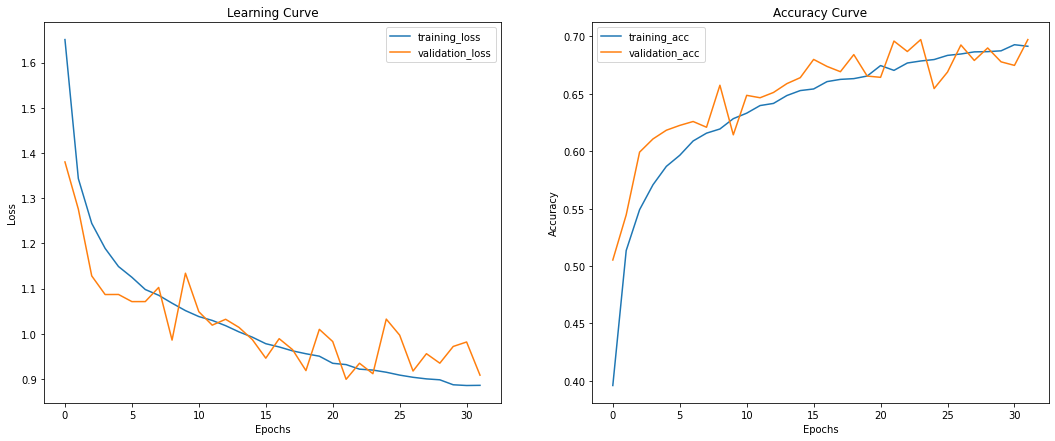

In [31]:
#畫圖
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(training_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend(loc='best')

plt.show()

## 作預測

In [35]:
#載入訓練好的模型
model = tf.keras.models.load_model(model_path)

In [36]:
#使用AI模型作預測
pred=model.predict(x_test)

In [37]:
#將預測的機率轉換成類別
ans=np.argmax(pred, axis=-1)

In [38]:
#畫出混淆矩陣
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(Y_test, ans)
print(cf_matrix)

[[765  31  53   7  17   2   5  10  56  54]
 [ 14 852   1   1   0   0   4   2  10 116]
 [ 80  17 580  24  86  41  88  47  15  22]
 [ 41  28  98 409  73 105 111  57  29  49]
 [ 34   4  86  39 629  10  75 108   8   7]
 [ 20   8  81 160  48 499  45 101  16  22]
 [  7  15  56  31  35  12 820   5   7  12]
 [ 17   7  46  19  61  30   7 768   3  42]
 [106  54  10   2   2   0   2   5 762  57]
 [ 17  61   4   4   3   0   7   9  19 876]]


<AxesSubplot:>

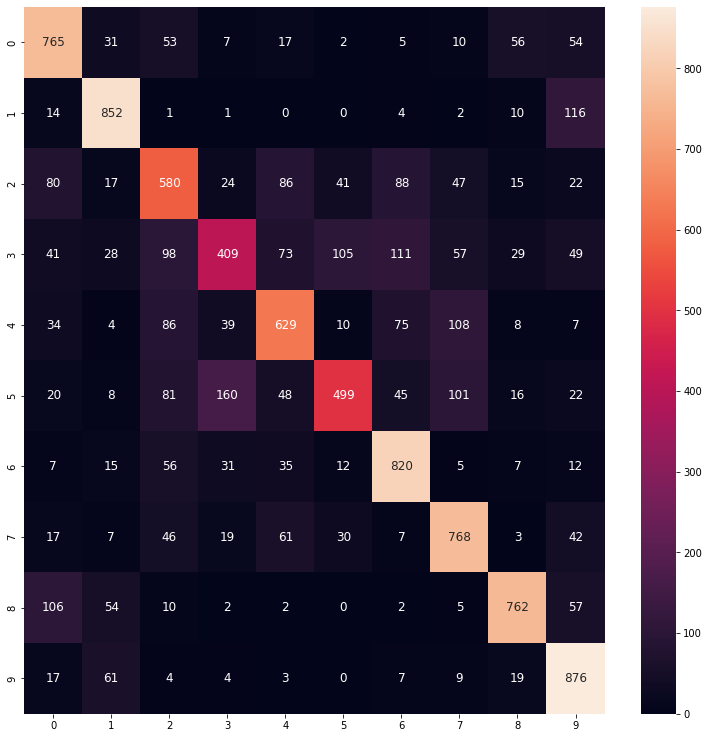

In [39]:
#對混淆矩陣畫圖
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(cf_matrix, fmt='g', annot=True, annot_kws={"size":12})

In [40]:
#計算統計指標
from sklearn.metrics import classification_report
report = classification_report(Y_test, ans)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.79      0.85      0.82      1000
           2       0.57      0.58      0.58      1000
           3       0.59      0.41      0.48      1000
           4       0.66      0.63      0.64      1000
           5       0.71      0.50      0.59      1000
           6       0.70      0.82      0.76      1000
           7       0.69      0.77      0.73      1000
           8       0.82      0.76      0.79      1000
           9       0.70      0.88      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.70      0.69     10000

